# Netflix Exploratory Data Analysis and Recommendation System
Created by Jamil Abbas   
Last Updated: 2021-04-30 

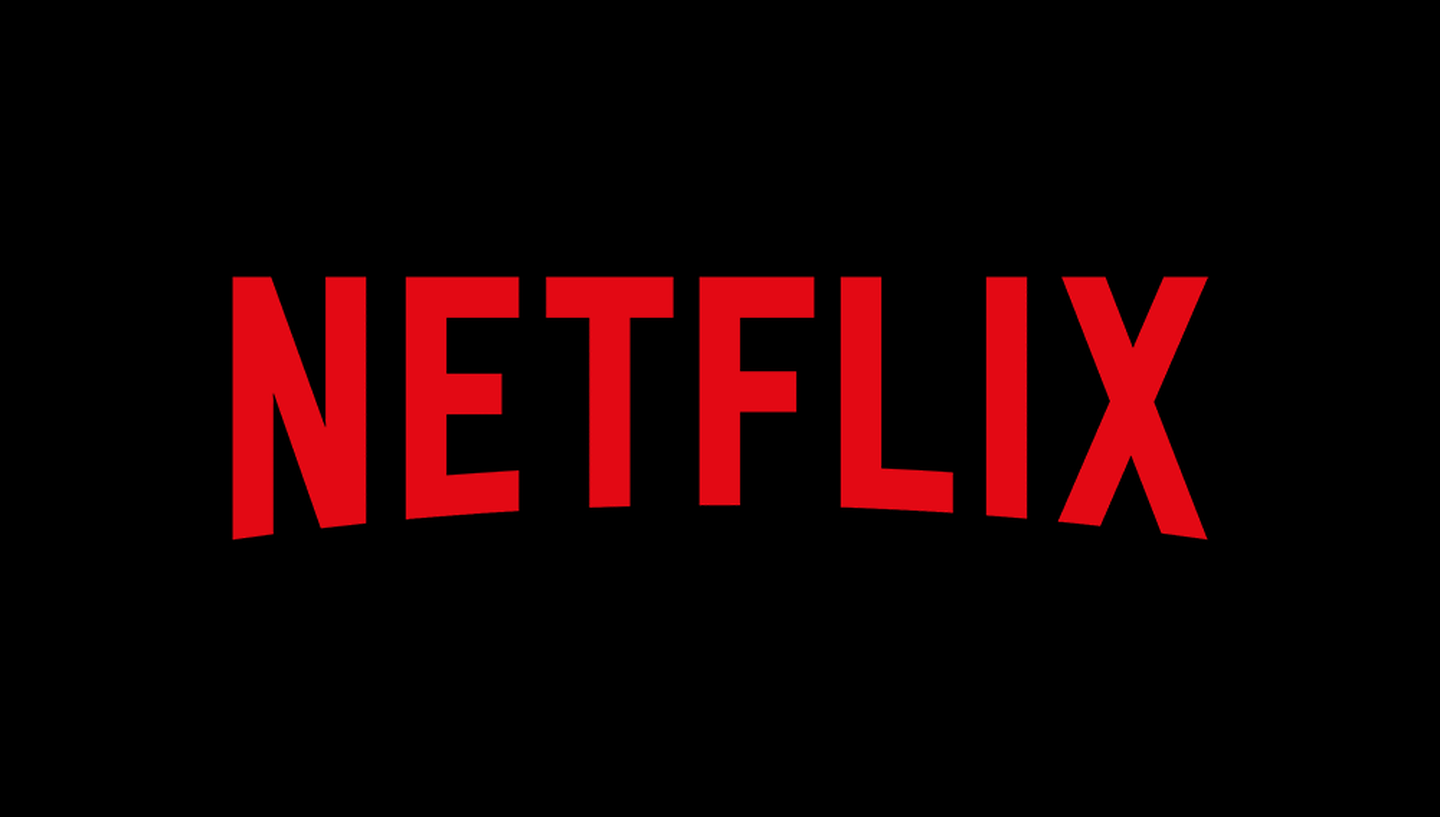 $^2$

Netflix has grown to become one of the giants in the streaming service industry. Initially Netflix was a movie rental company that shipped DVDs to subscribers homes on the basis that the DVDs would be sent back to allow access to the other movies they provided. In 2007 Netflix lauched its online streaming service for which it is most famous today. In 2001 Netflix had roughly 400,000 subscribers which has now skyrocketed to roughly 203.66 million subscribers in 2020. $^5$ The first half of this project aims to encapsulate the type of service Netflix has to offer. Through an exploratory data analysis, multiple visualization techniques are utilized to paint the picture of Netflix's service and provide insight as to what types of programs they prioritize, the reigion the programs originated from, their ratings, and so on. 

The second half of this project aims to create a recommendation system utilizing the dataset of Netflix programs. The ability to provide users with valuable recommendations is an essential factor in Netflix's success and in fighting competition. Over the last couple years multiple other entertainment companies are putting out their own streaming services to compete with Netflix (Disney+, Paramount+, Hulu, Amazon Prime Video etc.), but one of the most valuable assests in consumer retention is having a good recommendation system. What this system does is incentivize Netflix customers to continue to use their product once they have watched a program they enjoyed. Since Netflix operates on a monthly payment plan, customer retention is crucial to their revenue and business model. Initially, one would think that having a large entertainment library of programs would be beneficial in keeping customers but having too big of a selection could result in decision fatigue. So simply having the biggest library of entertainment isn't the only aspect of their business that is needed to retain their customers. Having a substantial set of programs that is exclusive to their streaming service, in addition to having a robust and generalized recommendation system to combat decision fatigue are however much more influential in retaining customers and is why this project aims to build a recommendation system for Netflix. 

The data utilized is from Flixable which is a third party Netflix search engine. $^1$

In [1]:
####################
# REQUIRED MODULES #
####################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

## Import/Clean the Data

The dataset contains the following columns:
 - __show_id:__ ID number of the show
 - __type:__ Type of program (TV show or Movie)
 - __title:__ Title of the program
 - __director:__ Director of the program
 - __cast:__ Cast of the program
 - __country:__ Country of origin of the program
 - __date_added:__ Date the program was added 
 - __release_year:__ Release year 
 - __rating:__ Rating of the program
 - __listed_in:__ Genre/Category of the program
 - __description:__ Description/plot summary of the program 

In [2]:
#Import the data 
df = pd.read_csv('netflix_titles.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
#check missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

The columns that contain missing values include: 'director', 'cast', 'country', 'rating', and 'date_added'. Given the nature of the 'director' and 'cast' categories and the magnitude of unique values they contain, these columns will be dropped. The 'date_added' column will also be dropped as it doesn't provide too much benefit. The 'release_year' column will provide the data to plot the spread of program frequency versus date, fufilling the role the 'date_added' column inteded to do. 

As for the 'country' and 'rating' columns, the missing values will be filled with the most frequent data point in their respective columns (the mode). 

In [4]:
#Drop 'cast', 'date_added' and 'director' columns
df = df.drop(columns=['director', 'cast', 'date_added'], axis=1)

#Fill missing values in 'rating' and 'country' by their most common values 
df['country'] = df['country'].fillna(df['country'].mode().values[0])
df['rating'] = df['rating'].fillna(df['rating'].mode().values[0])

#Check updated null values
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Exploratory Data Analysis

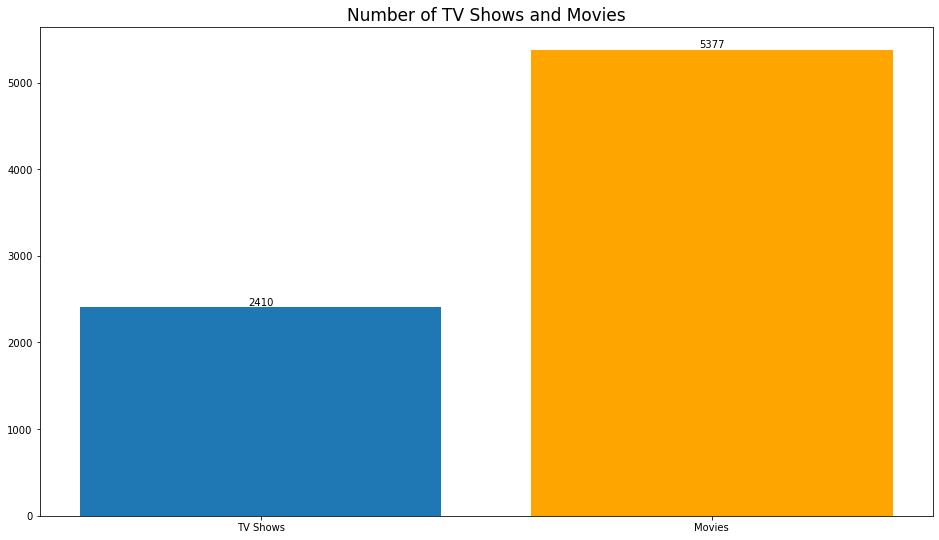

In [5]:
#Plot comparison of movies vs tv shows
tv_count = len(df[df['type']=='TV Show'])
movie_count = len(df[df['type']=='Movie'])
counts = [tv_count, movie_count]

plt.figure(figsize=(16,9))
bar_x = ['TV Shows', 'Movies']
plt.title('Number of TV Shows and Movies', fontsize=17)
bar = plt.bar(bar_x, counts)  
bar[1].set_color('orange')
#Annotate the bars to show the number above each category 
for i in range(len(counts)):
    plt.annotate(str(counts[i]), xy=(i, counts[i]), ha='center', va='bottom')

Text(0.5, 1.0, 'Percentages of TV Shows and Movies')

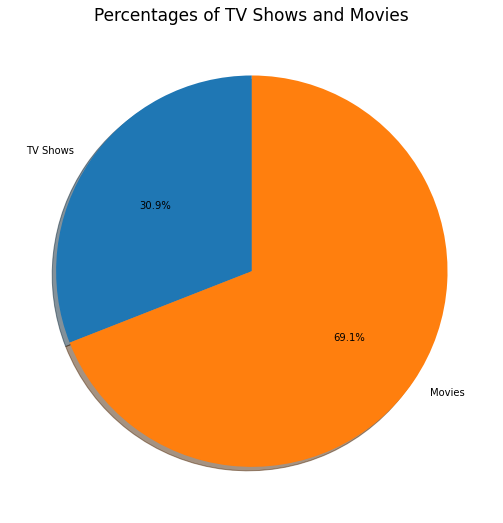

In [6]:
#Pie chart of percentages of movies vs tv shows
plt.figure(figsize=(16,9))
plt.pie(counts, labels=bar_x, shadow=True, autopct='%1.1f%%', startangle=90)
plt.title('Percentages of TV Shows and Movies', fontsize=17)

Text(0.5, 1.0, 'Release Year of Netflix Movies/TV Shows')

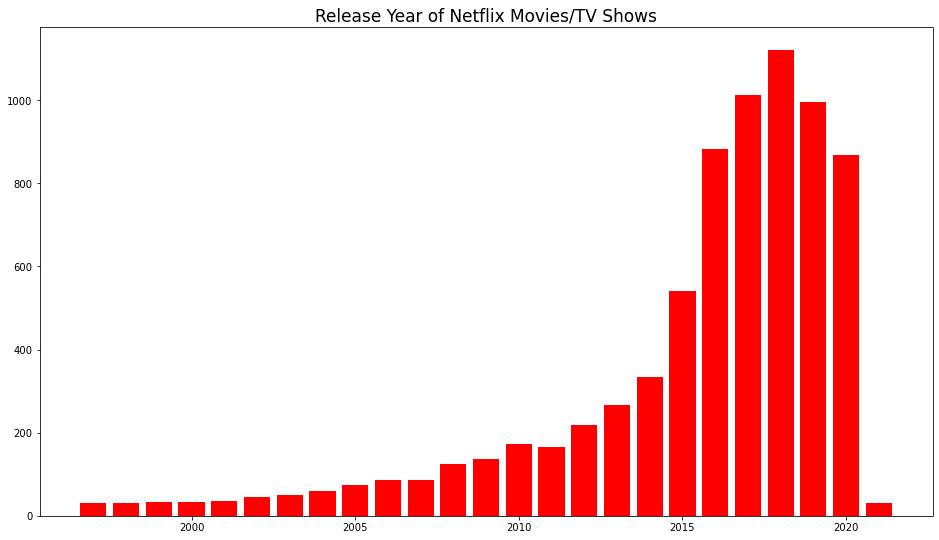

In [7]:
#Release year of media distribution(1995-2020)
years = df['release_year'].value_counts(ascending=True)[-25:]

plt.figure(figsize=(16,9))
plt.bar(years.index, years, color='red')
plt.title('Release Year of Netflix Movies/TV Shows', fontsize=17)

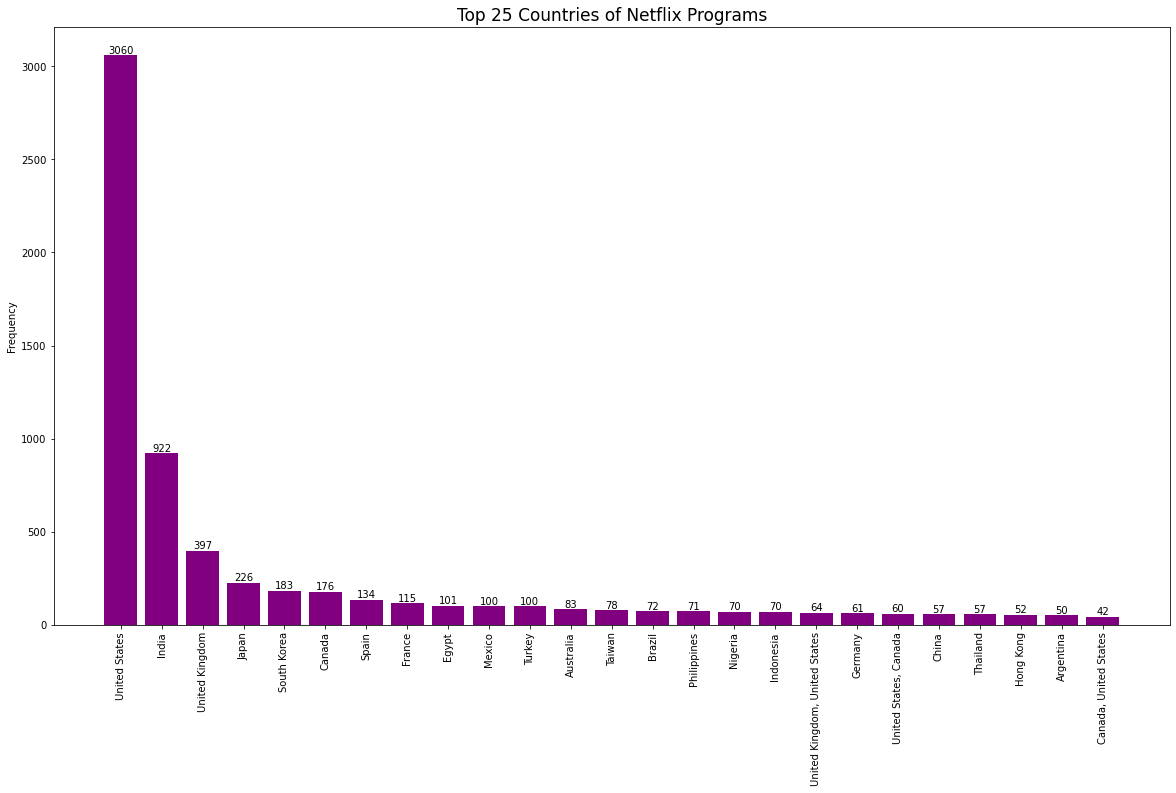

In [28]:
#Take top 25 countries by frequency 
country = df['country'].value_counts()[:25]

#Plot the figure
plt.figure(figsize=(20,11))
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 25 Countries of Netflix Programs', fontsize=17)
plt.bar(country.index, country, color='purple')
#Plot annotations above each bar
for i in range(len(country)):
    plt.annotate(str(country[i]), xy=(i, country[i]), ha='center', va='bottom')

Text(0.0, 1.0, 'Percentages of Top 25 Countries')

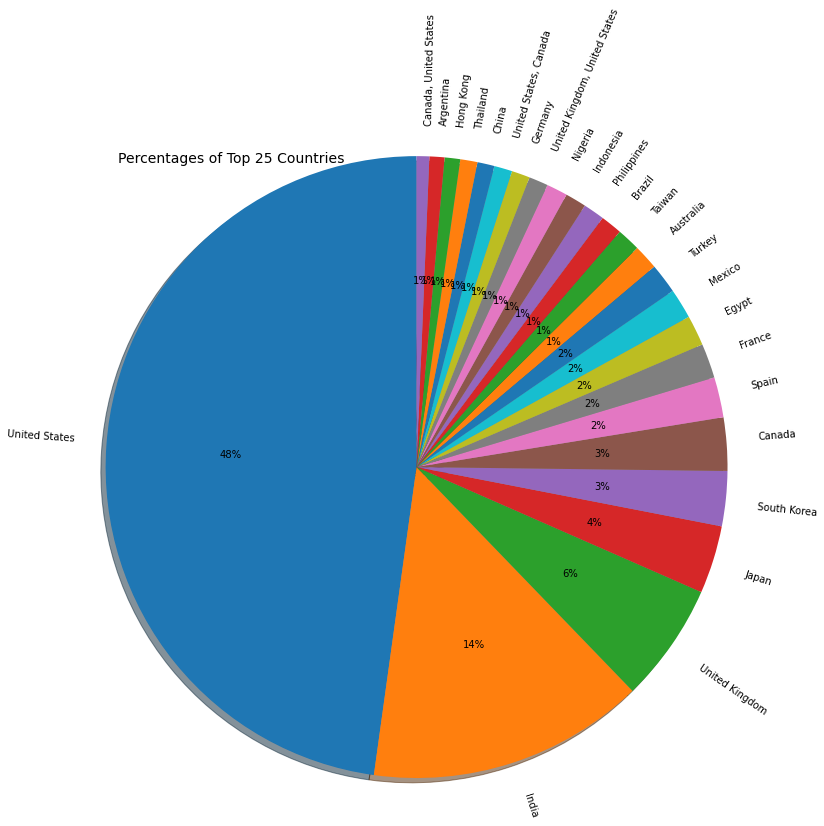

In [11]:
#Percentages of Netflix Programs based on release country
plt.figure(figsize=(20,11))
country=country[:25]
plt.pie(country[:], labels=country.index, shadow=True, autopct='%.0f%%', startangle=90, radius=1.3, rotatelabels=True)
plt.title('Percentages of Top 25 Countries', loc='left', fontsize=14)

Combine TV-Y7 and TV-Y7-FV (fantasy violence) categories as TV-Y7-FV is almost negiligible value on its down. They also fufill the same role in regards to our analysis. 

In [12]:
#Adjust dataframe to combine 'TV-Y7-FV' and 'TV-Y7' datapoints
df.loc[df.rating == 'TV-Y7-FV'] = 'TV-Y7'
print(df['rating'].value_counts()) 

TV-MA    2870
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
TV-Y7     277
PG        247
TV-G      194
NR         84
G          39
UR          5
NC-17       3
Name: rating, dtype: int64


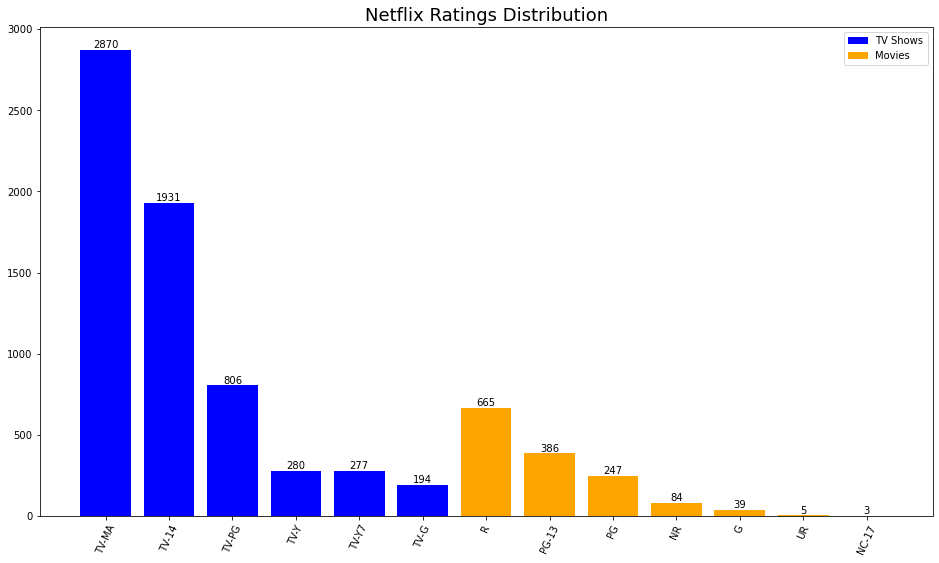

In [13]:
#Distribution of ratings

#Build dictionary of ratings based type of program (movie or tv show)
rating = df['rating'].value_counts()
rating_index = rating.index
rating_dict = {'TV':[], 'Movie':[]}
tv_count = []
movie_count = []
for i in range(len(rating_index)):
    if rating_index[i].startswith('TV'):
        rating_dict['TV'].append(rating_index[i])
        tv_count.append(rating[rating_index[i]])
    else:
        rating_dict['Movie'].append(rating_index[i])
        movie_count.append(rating[rating_index[i]])

#Plot the figure
plt.figure(figsize=(16,9))
plt.bar(rating_dict['TV'], tv_count, color='blue')
plt.bar(rating_dict['Movie'], movie_count, color='orange')
plt.title('Netflix Ratings Distribution', fontsize=18)
plt.xticks(rotation=65)
plt.legend(bar_x)

#Add numerial annotations on top of each bar
for i in range(len(tv_count)):
    plt.annotate(str(tv_count[i]), xy=(i, tv_count[i]), ha='center', va='bottom')

for i in range(len(movie_count)):
    plt.annotate(str(movie_count[i]), xy=(i+6, movie_count[i]), ha='center', va='bottom')

Text(0.5, 1.0, 'Netflix TV-Shows Rating Distribution')

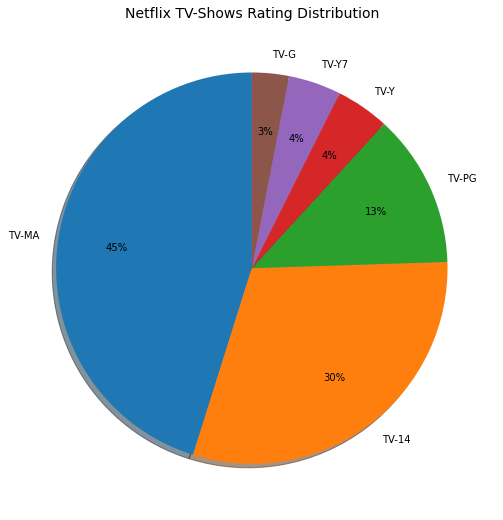

In [14]:
#Pie chart for percentage rating distribution on TV shows
plt.figure(figsize=(16,9))
plt.pie(tv_count, labels=rating_dict['TV'], shadow=True, autopct='%.0f%%', pctdistance = 0.7, startangle=90, rotatelabels=False)
plt.title('Netflix TV-Shows Rating Distribution', fontsize= 14)

Text(0.5, 1.0, 'Netflix Movies Rating Distribution')

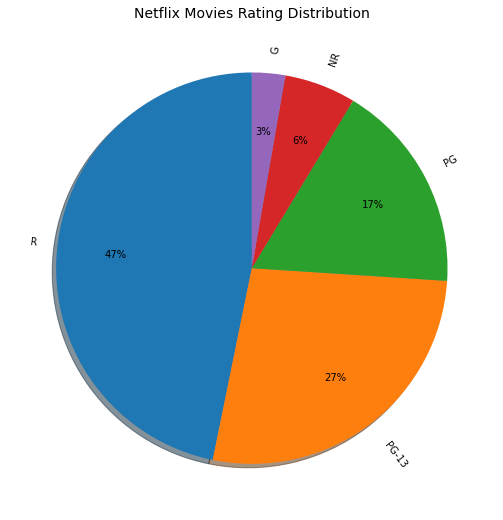

In [15]:
#Pie chart for percentage rating distribution on movies
plt.figure(figsize=(16,9))
#Excluded UR and NC-17 ratings as their percentages were negigable (< 1%)
plt.pie(movie_count[:-2], labels=rating_dict['Movie'][:-2], shadow=True, autopct='%.0f%%', pctdistance = 0.7, startangle=90, rotatelabels=True)
plt.title('Netflix Movies Rating Distribution', fontsize=14)

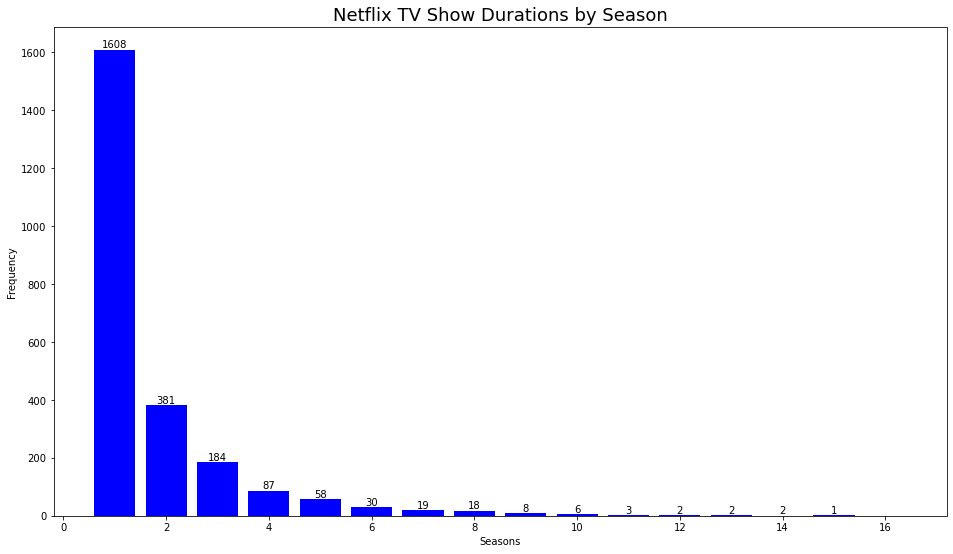

In [17]:
tv_dur = df[df['type']=='TV Show'][['duration']]
#Build an array of the index of duration of tv shows
dur_index = []
for i in range(len(tv_dur.value_counts().index)):
    split = tv_dur.value_counts().index[i][0].split()
    dur_index.append(int(split[0]))
    
#Plot the chart    
plt.figure(figsize=(16,9))
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.title('Netflix TV Show Durations by Season', fontsize=18)
plt.bar(dur_index, tv_dur.value_counts().array, color='blue')
#Add annotations above each bar
for i in range(len(tv_dur.value_counts().array)):
    plt.annotate(str(tv_dur.value_counts().array[i]), xy=(i+1, tv_dur.value_counts().array[i]), ha='center', va='bottom')

<BarContainer object of 200 artists>

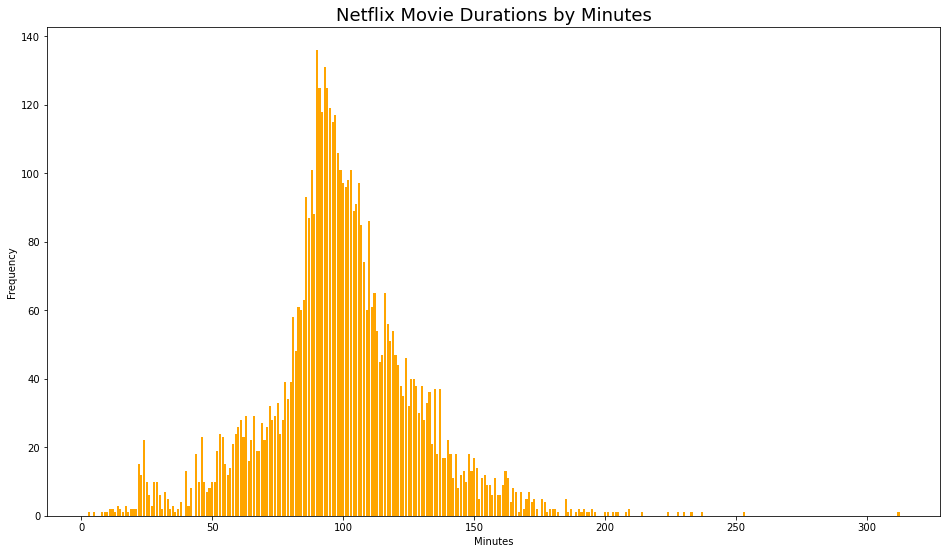

In [18]:
#Build index of durations of movies 
movie_dur = df[df['type']=='Movie'][['duration']]
movie_index = []

for i in range(len(movie_dur.value_counts().index)):
    split = movie_dur.value_counts().index[i][0].split()
    movie_index.append(int(split[0]))

#Plot the chart    
plt.figure(figsize=(16,9))
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Netflix Movie Durations by Minutes', fontsize=18)
plt.bar(movie_index, movie_dur.value_counts().array, color='orange')

## Recommendation Bot

We wish to build a model that will be able to provide the user with valuable Netflix program recommendations based on a program that they enjoyed. There are two types of recommendation candidate generating systems: 

- __Content-based filtering system:__ As described in the title, this system utilizes the content within the dataset to match candidates with the closest features and offer them as recommendations. 

- __Collaborative filtering system:__ This system utilzes prefernce/taste data from other users to map the candidates as recommendations. This system differs as dataset doesn't need to include features, the aim of the model is to map prefernces of users so when a new user is introduced it can map his/her opinion and provide a recommendation. $^3$ 

In regards to the Netflix dataset, a content-based filtering system would work for our recomendation system as our dataset contains Netflix programs and their features. 

In [6]:
#Create Data frame containing 'title' and 'describtion'
#Combine 'listen_in' and 'describtion' columns into one column so both genre and plot summary are used when conducting analysis 

df_R = df[['title', 'listed_in', 'description']]
df_R['description_genre'] = df_R['listed_in'] + ' ' + df_R['description']
df_R = df_R[['title', 'description_genre']]
df_R

<ipython-input-6-4fbcdd686341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_R['description_genre'] = df_R['listed_in'] + ' ' + df_R['description']


,title,description_genre
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,7:19,"Dramas, International Movies After a devastati..."
2,23:59,"Horror Movies, International Movies When an ar..."
3,9,"Action & Adventure, Independent Movies, Sci-Fi..."
4,21,Dramas A brilliant group of students become ca...
...,...,...
7782,Zozo,"Dramas, International Movies When Lebanon's Ci..."
7783,Zubaan,"Dramas, International Movies, Music & Musicals..."
7784,Zulu Man in Japan,"Documentaries, International Movies, Music & M..."
7785,Zumbo's Just Desserts,"International TV Shows, Reality TV Dessert wiz..."


To extract the features of the Netflix programs we will utilize a Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer to transform our data points into feature vectors. TF-IDF is defined as: 

- __Term Frequency (TF):__ This is how frequently a word is used in particular document (in our case a document is the description of the program plus it's genre). This is taken as a raw count of the frequency of the word, which can then be adjusted given the length of the document. 

- __Inverse Document Frequency:__ The IDF of a word is the rarity of the word given the entire set of documents. The closer to 0, the more common the word is. $^4$

Combining both of these aspects, the TF-IDF vectorizer can numerically vectorize text based on the frequency and rarity of the words it contains. This then solves the issue of transforming our features into numerical data points in which numerical analysis can be conducted.  

After vectorizing the data, the cosine similarity is then taken as a means of comparison. The cosine similarity is the cosine of the angle between the two vectors being compared. Two vectors which are oriented in the same direction will have a cosine similarity of 1, while two vectors perpendicular two each other (90°) will have a cosine similarity of 0. Given that the cosine similarity is a comparison metric based on vector orientation, it can be used to compare our vectorized program descriptions and ultimately provide recommendations by calling the vectors that are most closely oriented with the vector of the program that is given as an input.  

In [7]:
#Preprocess 'description_genre' using nltk 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()
verb_codes = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

#Custom defined function to preproccess the test in the 'description_genre'

def preprocess_text(text):
    '''
    Name: preprocess_text
    Inputs: text, string of text to clean
    Purpose: Cleans a string of text by making the text lowercase, removing punctuation, lemmatizing words, and removing stopwords.   
    '''
    final_arr = []
    #Make text lowercase
    text = text.lower()
    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #Create list of tokens, and list of tags 
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    #Iterate through the tokens, and lemmatize accordingly (if token is a verb or not)
    for i,token in enumerate(tokens):
        if tags[i][1] in verb_codes:
            lemmatized = lemmatizer.lemmatize(token, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(token)
        final_arr.append(lemmatized)
        if lemmatized not in stop_words:
            final_arr.append(lemmatized)
    final_string = ' '.join(final_arr)
    return final_string    

#Apply preprocess_text to 'description_genre' and create new column containing cleaned descriptions
df_R['clean_description_genre'] = df_R['description_genre'].apply(preprocess_text)
df_R.set_index('title', inplace=True)
df_R

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,description_genre,clean_description_genre
title,,
3%,"International TV Shows, TV Dramas, TV Sci-Fi &...",international international tv tv show show tv...
7:19,"Dramas, International Movies After a devastati...",drama drama international international movie ...
23:59,"Horror Movies, International Movies When an ar...",horror horror movie movie international intern...
9,"Action & Adventure, Independent Movies, Sci-Fi...",action action adventure adventure independent ...
21,Dramas A brilliant group of students become ca...,dramas dramas a brilliant brilliant group grou...
...,...,...
Zozo,"Dramas, International Movies When Lebanon's Ci...",drama drama international international movie ...
Zubaan,"Dramas, International Movies, Music & Musicals...",drama drama international international movie ...
Zulu Man in Japan,"Documentaries, International Movies, Music & M...",documentary documentary international internat...


In [10]:
#Apply the TF_IDF vectorizer 
tfidf = TfidfVectorizer()
tfidf_description = tfidf.fit_transform(df_R['clean_description_genre'])

#Use cosine similarity to compare the transformed vectors
cosine = cosine_similarity(tfidf_description, tfidf_description)

In [14]:
#Define function to return recommendations based on cosine similarity with custom num_recommendations value
titles = pd.Series(df_R.index)

def recommend(title, camparison = cosine, num_recommendations=10):
    '''
    Name: recommend
    Inputs: title, string of the netflix program 
            comparison, ndarry consisting of the cosine similarities 
            num_recommendations, int of the number of recommendations to display (default=10)
    Purpose: Take in a string of a netflix program and return a dataframe containing the title, type, 
             and description of a specified number of recommendations based on their cosine similarity.
    '''
    if title in df[['title']].to_numpy():
        index = titles[titles == title].index[0]
        scores_index = pd.Series(cosine[index]).sort_values(ascending=False).index.array[:num_recommendations+1]
        scores_index = scores_index[1:]
        #return dataframe of recommended programs including 'type', 'title', and 'description'
        return df.iloc[scores_index, [1,2,-1]]
    else:
        raise(ValueError('Error: Program not found'))

In [15]:
#Test recommendations on A Little Chaos, All Dogs go to Heaven, Black Mirror(20 recommendations), Stranger Things(5 recommendations)
recommend('A Little Chaos')

,type,title,description
7406,TV Show,Versailles,King Louis XIV of France commissions a lavish ...
4205,TV Show,Monty Don's French Gardens,TV personality Monty Don visits France’s most ...
866,Movie,Bewafaa,A young woman faces pressure to marry her brot...
3970,TV Show,Marvel's The Punisher,A former Marine out to punish the criminals re...
4352,Movie,My Scientology Movie,After speaking with former Scientology members...
5941,Movie,Swiped,When two college roommates develop a groundbre...
6164,Movie,The Boy,A nanny is hired by a couple to look after the...
6129,TV Show,The Big Flower Fight,"Ten pairs of florists, sculptors and garden de..."
4805,Movie,Peace Haven,Complications around the cremation of their de...
1928,Movie,Eeda,Two young adults with families on opposite end...


In [16]:
recommend('All Dogs Go to Heaven')

,type,title,description
4247,Movie,Mowgli: Legend of the Jungle,An orphaned boy raised by animals in the jungl...
7294,Movie,U Turn,A reporter must hunt for the truth behind a st...
1832,Movie,Double Dad,"While her mom is away, a teen sneaks out of th..."
7722,Movie,You Are My Home,"After becoming separated from her family, a yo..."
1030,Movie,Bolt,"This tale follows German shepherd Bolt, a cani..."
1004,Movie,BluffMaster!,When his girlfriend learns the truth about his...
7497,Movie,We Are Legends,"Raised in a boxing gym, two orphaned brothers ..."
7252,Movie,True: Tricky Treat Day,It's up to True and her friends to save the da...
4302,Movie,My Amnesia Girl,Years after leaving his bride-to-be at the alt...
4489,TV Show,No Good Nick,A family finds their lives turned upside down ...


In [17]:
recommend('Black Mirror', num_recommendations=20)

,type,title,description
1532,TV Show,Creeped Out,"A masked figure known as ""The Curious"" collect..."
7088,TV Show,Til Death Do Us Part,Based on the speculative short stories of Mirr...
4686,TV Show,Osmosis,"In near-future Paris, two brilliant siblings u..."
6059,TV Show,The A List,"Romance, rivalry and radical mystery collide a..."
5283,TV Show,Rosario Tijeras,Worlds collide when a vengeance-obsessed young...
2137,TV Show,Fear Files... Har Mod Pe Darr,"Possessed lovers, witches, haunted houses and ..."
5799,TV Show,Start-Up,Young entrepreneurs aspiring to launch virtual...
1687,TV Show,Degrassi: Next Class,Degrassi's next generation of high-tech newbie...
4683,TV Show,Origins Collection,This documentary series explores the stories b...
2461,TV Show,Goedam,"When night falls on the city, shadows and spir..."


In [18]:
recommend('Stranger Things', num_recommendations=5)

,type,title,description
6715,TV Show,The OA,"Seven years after vanishing from her home, a y..."
534,TV Show,Anjaan: Special Crimes Unit,The cases are supernatural; the police officer...
2697,TV Show,Hemlock Grove,Secrets are just a part of daily life in the s...
6056,TV Show,The 4400,4400 people who vanished over the course of fi...
63,TV Show,13 Reasons Why,"After a teenage girl's perplexing suicide, a c..."


## Concluding Thoughts and Future Project Improvements 

- We managed to build a content-based filtering recommendation system for Netflix programs that utilizes a TF-IDF vectorizer and cosine similarity. The system serves as a good initial starting point into developing a more complex and valuable model. 

- There are pitfalls/areas of improvement for the model as a starting point for a next project: 
    - Combining category/genre with plot summary into a single feature made words such as 'TV Show' and 'Movie' extremely valuable in the eyes of the TF-IDF vectorizer. This can be seen as a benefit but from some of the recommendations it can be observed that the model could be overprioritizing these words. 
    - The recommend function only takes in a single Netflix program as a starting point for recommendations. Future improvements to this model could include inputting multiple programs the user enjoyed and generating more valuable recommendations.
    - Given the nature of the dataset the model was limited to a content-based filtering method, but a possible improvement is to include new data that contains user preferences and incorporate a collaborative-filtering system in addtion to the current system. Having both systems could help improve the quality of recommendations the model is able to give. 

## References

$1$: Kaggle, Shivam Bansal, Netflix Movies and TV Shows, Accessed 2021-03-05, Online: https://www.kaggle.com/shivamb/netflix-shows  
$2$: Nxtbookmedia, Matt Clement, Learning from Netflix’s New Logo Design, Accessed 2021-04-30, Online: https://www.nxtbookmedia.com/blog/learning-netflixs-new-logo-design/  
$3$: Towardsdatascience, Abhijit Roy, Introduction To Recommender Systems, Accessed 2021-04-20, Online: https://towardsdatascience.com/introduction-to-recommender-systems-1-971bd274f421  
$4$: Monkeylearn, What is TF-IDF?, Accessed 2021-04-02, Online: https://monkeylearn.com/blog/what-is-tf-idf/  
$5$: Backlinko, Brian Dean, Netflix Subscriber and Growth Statistics, Accessed 2021-04-30, Online: https://backlinko.com/netflix-users  